In [33]:
import cv2
import mediapipe as mp
import pandas as pd
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [2]:
# cap = cv2.VideoCapture(1)
# with mp_holistics.Holistic(
#     min_detection_confidence=0.8,
#     min_tracking_confidence=0.8
# ) as holistic:
#     while cap.isOpened():
#         success,image=cap.read()
#         cv2.imshow('Webcam', image)
#         if not success:
#             print('Ignoring empty frames')
#             continue
#         image.flags.writeable = False
#         # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#         print(result)
#         break
# cap.release()


In [14]:
# For webcam input:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # # Draw landmark annotation on the image.
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.face_landmarks,
    #     mp_holistic.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp_drawing_styles
    #     .get_default_face_mesh_contours_style())
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.pose_landmarks,
    #     mp_holistic.POSE_CONNECTIONS,
    #     landmark_drawing_spec=mp_drawing_styles
    #     .get_default_pose_landmarks_style())
    # # Flip the image horizontally for a selfie-view display.
    # cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    # if cv2.waitKey(5) & 0xFF == 27:
    break
cap.release()


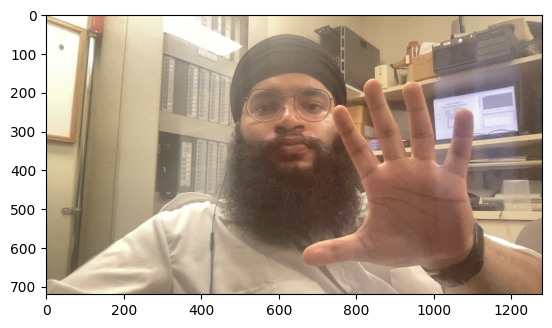

In [15]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [27]:
results.left_hand_landmarks.landmark[0].x


0.7905874848365784

In [62]:
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()
if results.face_landmarks is not None:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.pose_landmarks is not None:
    for i , point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
if results.left_hand_landmarks is not None:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.right_hand_landmarks is not None:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]            

In [93]:
landmarks = pd.DataFrame()
if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):         
                landmarks.loc[0, [f"x_face_{i}",f"y_face_{i}",f"z_face_{i}"]] = [point.x, point.y, point.z]
if results.pose_landmarks:
        for i, point in enumerate(results.pose_landmarks.landmark):
                landmarks.loc[0, [f"x_pose_{i}",f"y_pose_{i}",f"z_pose_{i}"]]= [point.x, point.y, point.z]
if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):        
                landmarks.loc[0, [f"x_left_hand_{i}",f"y_left_hand_{i}",f"z_left_hand_{i}"]] = [point.x, point.y, point.z]
if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
                landmarks.loc[0, [f"z_right_hand_{i}",f"z_right_hand_{i}",f"z_right_hand_{i}"]] = [point.x, point.y, point.z] 

        # landmarks.loc[0, f"y_face_{i}"] = point.y 
        # landmarks.loc[0, f"z_face_{i}"] = point.z

    


In [94]:
len(landmarks.columns)

1566

<Axes: xlabel='x', ylabel='y'>

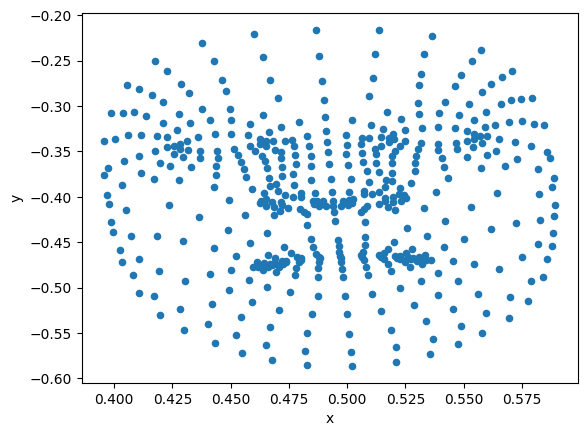

In [49]:
face['y'] = -face['y']
face.plot(x='x', y='y', kind='scatter')`

<Axes: xlabel='x', ylabel='y'>

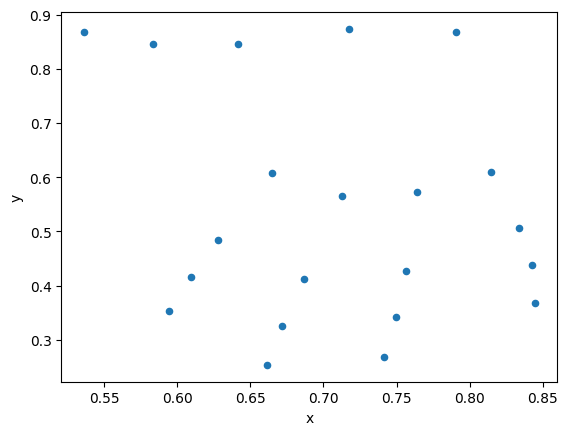

In [60]:
left_hand.plot(x='x', y='y', kind='scatter')

In [61]:
pd.read_csv('https://www.kaggle.com/competitions/asl-fingerspelling/data?select=train.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2
